In [1]:
import pandas as pd

hp_ohe = pd.read_csv("harryPotterCleanOHE.csv")
hp_oe = pd.read_csv("harryPotterCleanOE.csv")
hp_me = pd.read_csv("harryPotterClean.csv")

time_counts = pd.DataFrame(hp_me['Harry_Potter_and_the_Forbidden'].value_counts())
time_counts

,Harry_Potter_and_the_Forbidden
10.0,2924
15.0,2078
25.0,1448
45.0,1391
35.0,1323
20.0,1258
60.0,1148
75.0,886
90.0,614
40.0,437


In [2]:
data = {'time':[  0,	5,	10,	11,	15,	20,	25,	30,	35,	40,	45,	50,	55,	60,	65,	70,	75,	80,	85,	90,	95,	100,	105,	110,	115,	120,	125,	130,	135,	145,	150,	180,],
        'count':[1,	66,	2922,	1,	2078,	1258,	1447,	249,	1323,	437,	1391,	399,	301,	1148,	222,	115,	886,	113,	115,	614,	75,	144,	138,	76,	28,	196,	2,	1,	3,	1,	10,	5,]}
df=pd.DataFrame(data)
df

,time,count
0,0,1
1,5,66
2,10,2922
3,11,1
4,15,2078
5,20,1258
6,25,1447
7,30,249
8,35,1323
9,40,437


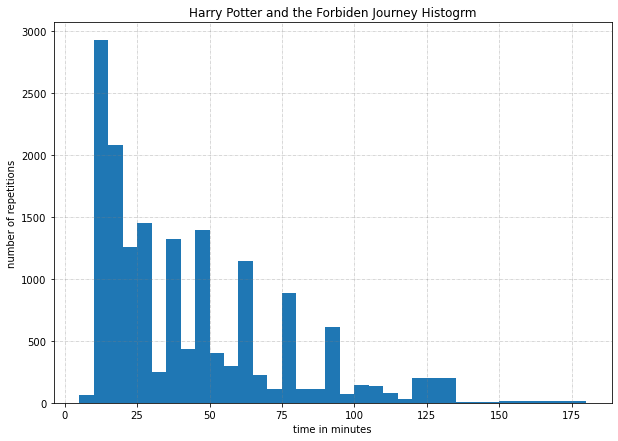

In [3]:
y = hp_me.Harry_Potter_and_the_Forbidden

from matplotlib import pyplot as plt
from scipy import stats

fig, ax = plt.subplots(figsize =(10, 7))
bins = [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55, 60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 
        110, 115, 120, 135, 150, 180]

# Add title and axis names
plt.title('Harry Potter and the Forbiden Journey Histogrm')
plt.xlabel('time in minutes')
plt.ylabel('number of repetitions')

ax.hist(y, bins)
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
plt.show()

/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'number of repetitions')

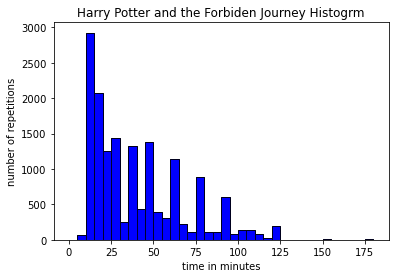

In [24]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(hp_me['Harry_Potter_and_the_Forbidden'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(hp_me['Harry_Potter_and_the_Forbidden'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Harry Potter and the Forbiden Journey Histogrm')
plt.xlabel('time in minutes')
plt.ylabel('number of repetitions')

<AxesSubplot:xlabel='Harry_Potter_and_the_Forbidden', ylabel='Density'>

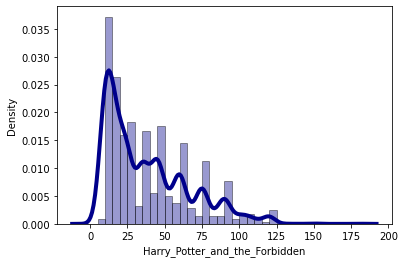

In [25]:
# Density Plot and Histogram of all arrival delays
sns.distplot(hp_me['Harry_Potter_and_the_Forbidden'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [13]:
print(sorted(Counter(y).items()))

[(0.0, 1), (5.0, 66), (10.0, 2922), (11.0, 1), (15.0, 2078), (20.0, 1258), (25.0, 1443), (30.0, 249), (35.0, 1319), (40.0, 437), (45.0, 1385), (50.0, 397), (55.0, 301), (60.0, 1145), (65.0, 222), (70.0, 115), (75.0, 886), (80.0, 113), (85.0, 115), (90.0, 613), (95.0, 75), (100.0, 144), (105.0, 138), (110.0, 76), (115.0, 28), (120.0, 196), (125.0, 2), (130.0, 1), (135.0, 3), (145.0, 1), (150.0, 10), (180.0, 5)]


### Random Oversampling Technique

In [15]:
# Oversampling and under sampling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

def getXandY(df):
    df.drop(df.tail(20).index,inplace=True) 
    x = df.drop(['Harry_Potter_and_the_Forbidden','Unnamed: 0'],axis=1)
    y = df.Harry_Potter_and_the_Forbidden
    return(x,y)

def trainTest(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=True)
    return(X_train, X_test, y_train, y_test)

x,y=getXandY(hp_me)
X_train, X_test, y_train, y_test = trainTest(x,y)

In [16]:
print(sorted(Counter(y_train).items()))

[(0.0, 1), (5.0, 52), (10.0, 2064), (11.0, 1), (15.0, 1463), (20.0, 881), (25.0, 1022), (30.0, 176), (35.0, 943), (40.0, 295), (45.0, 936), (50.0, 278), (55.0, 205), (60.0, 792), (65.0, 139), (70.0, 85), (75.0, 609), (80.0, 79), (85.0, 82), (90.0, 432), (95.0, 55), (100.0, 100), (105.0, 95), (110.0, 52), (115.0, 21), (120.0, 133), (130.0, 1), (135.0, 2), (145.0, 1), (150.0, 8), (180.0, 4)]


#### Base metrics

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(max_iter=20000)
logisticRegr.fit(X_train, y_train)
y_pred=logisticRegr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         5.0       0.00      0.00      0.00        14
        10.0       0.30      0.79      0.43       858
        15.0       0.22      0.23      0.23       615
        20.0       0.03      0.00      0.00       377
        25.0       0.17      0.27      0.21       421
        30.0       0.00      0.00      0.00        73
        35.0       0.12      0.07      0.09       374
        40.0       0.00      0.00      0.00       142
        45.0       0.17      0.23      0.20       445
        50.0       0.00      0.00      0.00       111
        55.0       0.00      0.00      0.00        96
        60.0       0.18      0.02      0.04       349
        65.0       0.00      0.00      0.00        83
        70.0       0.00      0.00      0.00        30
        75.0       0.23      0.12      0.16       277
        80.0       0.00      0.00      0.00        34
        85.0       0.00      0.00      0.00        33
        90.0       0.14    

/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

### Randomly over sample

In [17]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))


[(0.0, 2064), (5.0, 2064), (10.0, 2064), (11.0, 2064), (15.0, 2064), (20.0, 2064), (25.0, 2064), (30.0, 2064), (35.0, 2064), (40.0, 2064), (45.0, 2064), (50.0, 2064), (55.0, 2064), (60.0, 2064), (65.0, 2064), (70.0, 2064), (75.0, 2064), (80.0, 2064), (85.0, 2064), (90.0, 2064), (95.0, 2064), (100.0, 2064), (105.0, 2064), (110.0, 2064), (115.0, 2064), (120.0, 2064), (130.0, 2064), (135.0, 2064), (145.0, 2064), (150.0, 2064), (180.0, 2064)]


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logisticRegr = LogisticRegression(max_iter=20000)
logisticRegr.fit(X_train_ros, y_train_ros).decision_function(X_test)
y_pred=logisticRegr.predict(X_test)

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))

Accuracy: 0.0907164052564646
Precision: 0.2157671076847339
Recall: 0.0907164052564646


/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
F1= metrics.f1_score(y_test, y_pred, average='weighted')
F1

0.11051452602905577

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         5.0       0.02      0.50      0.03        14
        10.0       0.41      0.17      0.24       858
        11.0       0.00      0.00      0.00         0
        15.0       0.33      0.12      0.18       615
        20.0       0.30      0.04      0.07       377
        25.0       0.22      0.13      0.16       421
        30.0       0.05      0.38      0.09        73
        35.0       0.19      0.03      0.05       374
        40.0       0.07      0.01      0.01       142
        45.0       0.22      0.04      0.07       445
        50.0       0.14      0.04      0.06       111
        55.0       0.04      0.10      0.06        96
        60.0       0.00      0.00      0.00       349
        65.0       0.04      0.12      0.06        83
        70.0       0.02      0.17      0.04        30
        75.0       0.15      0.04      0.06       277
        80.0       0.00    

/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

### Trimm outliers

In [33]:
vals_del=[0,125, 130, 135, 145, 150, 180]

In [26]:
hp_me.Harry_Potter_and_the_Forbidden.unique()

array([ 40.,  20.,  15.,  10.,  30.,  25.,  35.,  60.,   5.,  45.,  70.,
        80.,  75.,  90., 100., 120.,  95., 110.,  50., 105., 150.,  55.,
        65.,  85.,  11., 115., 145., 135., 125., 130., 180.,   0.])

In [35]:
print(sorted(hp_clean.Harry_Potter_and_the_Forbidden.unique()))

[5.0, 10.0, 11.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 105.0, 110.0, 115.0, 120.0, 125.0, 130.0, 135.0, 145.0, 150.0, 180.0]


In [39]:
hp_clean = hp_me[hp_me.Harry_Potter_and_the_Forbidden != 0] #delete rows with 0 min
hp_clean = hp_clean[hp_clean.Harry_Potter_and_the_Forbidden != 180]
hp_clean = hp_clean[hp_clean.Harry_Potter_and_the_Forbidden != 150]
hp_clean = hp_clean[hp_clean.Harry_Potter_and_the_Forbidden != 145]
hp_clean = hp_clean[hp_clean.Harry_Potter_and_the_Forbidden != 135]
hp_clean = hp_clean[hp_clean.Harry_Potter_and_the_Forbidden != 130]
hp_fin_clean = hp_clean[hp_clean.Harry_Potter_and_the_Forbidden != 125]

print(sorted(hp_fin_clean.Harry_Potter_and_the_Forbidden.unique()))

[5.0, 10.0, 11.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 105.0, 110.0, 115.0, 120.0]


In [43]:
xTrim,yTrim=getXandY(hp_fin_clean)
X_trainTrim, X_testTrim, y_trainTrim, y_testTrim = trainTest(xTrim,yTrim)

# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_rosTrim, y_train_rosTrim= ros.fit_resample(X_trainTrim, y_trainTrim)
# Check the number of records after over sampling
print(sorted(Counter(y_train_rosTrim).items()))

[(5.0, 2024), (10.0, 2024), (15.0, 2024), (20.0, 2024), (25.0, 2024), (30.0, 2024), (35.0, 2024), (40.0, 2024), (45.0, 2024), (50.0, 2024), (55.0, 2024), (60.0, 2024), (65.0, 2024), (70.0, 2024), (75.0, 2024), (80.0, 2024), (85.0, 2024), (90.0, 2024), (95.0, 2024), (100.0, 2024), (105.0, 2024), (110.0, 2024), (115.0, 2024), (120.0, 2024)]


/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
logisticRegr.fit(X_train_rosTrim, y_train_rosTrim).decision_function(X_testTrim)
y_predTrim=logisticRegr.predict(X_testTrim)
print(classification_report(y_testTrim, y_predTrim))

              precision    recall  f1-score   support

         5.0       0.01      0.43      0.03        14
        10.0       0.43      0.17      0.24       898
        11.0       0.00      0.00      0.00         1
        15.0       0.33      0.14      0.20       649
        20.0       0.12      0.02      0.04       353
        25.0       0.24      0.13      0.17       424
        30.0       0.05      0.55      0.10        71
        35.0       0.00      0.00      0.00       383
        40.0       0.14      0.02      0.04       146
        45.0       0.20      0.03      0.05       395
        50.0       0.03      0.04      0.03       113
        55.0       0.06      0.18      0.09        90
        60.0       0.00      0.00      0.00       339
        65.0       0.03      0.17      0.06        70
        70.0       0.04      0.16      0.06        31
        75.0       0.23      0.04      0.07       270
        80.0       0.00      0.03      0.01        30
        85.0       0.03    

/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

### SMOTE

In [81]:
x,y=getXandY(hp_me)
X_train, X_test, y_train, y_test = trainTest(x,y)
print(sorted(Counter(y_train).items()))

[(0.0, 1), (5.0, 51), (10.0, 2030), (11.0, 1), (15.0, 1462), (20.0, 880), (25.0, 990), (30.0, 177), (35.0, 909), (40.0, 302), (45.0, 954), (50.0, 255), (55.0, 204), (60.0, 788), (65.0, 154), (70.0, 82), (75.0, 626), (80.0, 72), (85.0, 89), (90.0, 452), (95.0, 58), (100.0, 106), (105.0, 94), (110.0, 54), (115.0, 16), (120.0, 141), (125.0, 2), (130.0, 1), (135.0, 3), (150.0, 7), (180.0, 4)]


In [82]:
# Lets clean our data, as the smote technique requires the class to have at least n neighbors
hp_clean = hp_me[hp_me.Harry_Potter_and_the_Forbidden != 0]
hp_clean = hp_clean[hp_me.Harry_Potter_and_the_Forbidden != 11]
hp_clean = hp_clean[hp_clean.Harry_Potter_and_the_Forbidden != 180]
hp_clean = hp_clean[hp_clean.Harry_Potter_and_the_Forbidden != 145]
hp_clean = hp_clean[hp_clean.Harry_Potter_and_the_Forbidden != 135]
hp_clean = hp_clean[hp_clean.Harry_Potter_and_the_Forbidden != 130]
hp_fin_clean = hp_clean[hp_clean.Harry_Potter_and_the_Forbidden != 125]

<ipython-input-82-06dce9ba7c4c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hp_clean = hp_clean[hp_me.Harry_Potter_and_the_Forbidden != 11]


In [59]:
x_Smote,y_Smote=getXandY(hp_fin_clean)
X_train, X_test, y_train, y_test = trainTest(x_Smote,y_Smote)
print(sorted(Counter(y_train).items()))

[(5.0, 44), (10.0, 2050), (15.0, 1431), (20.0, 868), (25.0, 1005), (30.0, 173), (35.0, 916), (40.0, 318), (45.0, 948), (50.0, 277), (55.0, 209), (60.0, 794), (65.0, 148), (70.0, 83), (75.0, 628), (80.0, 78), (85.0, 81), (90.0, 422), (95.0, 52), (100.0, 111), (105.0, 102), (110.0, 59), (115.0, 19), (120.0, 132), (150.0, 7)]


/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
# Randomly over sample the minority class
smote = SMOTE(random_state=42)
X_train_Smote, y_train_Smote= smote.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_Smote).items()))

[(5.0, 2050), (10.0, 2050), (15.0, 2050), (20.0, 2050), (25.0, 2050), (30.0, 2050), (35.0, 2050), (40.0, 2050), (45.0, 2050), (50.0, 2050), (55.0, 2050), (60.0, 2050), (65.0, 2050), (70.0, 2050), (75.0, 2050), (80.0, 2050), (85.0, 2050), (90.0, 2050), (95.0, 2050), (100.0, 2050), (105.0, 2050), (110.0, 2050), (115.0, 2050), (120.0, 2050), (150.0, 2050)]


In [61]:
logisticRegr.fit(X_train_Smote, y_train_Smote).decision_function(X_test)
y_pred_Smote=logisticRegr.predict(X_test)
print(classification_report(y_test, y_pred_Smote))

              precision    recall  f1-score   support

         5.0       0.02      0.41      0.04        22
        10.0       0.40      0.17      0.24       872
        15.0       0.33      0.15      0.20       647
        20.0       0.21      0.05      0.08       390
        25.0       0.18      0.10      0.13       424
        30.0       0.05      0.37      0.09        75
        35.0       0.10      0.01      0.02       387
        40.0       0.00      0.00      0.00       116
        45.0       0.22      0.02      0.03       424
        50.0       0.03      0.05      0.04       111
        55.0       0.05      0.14      0.08        91
        60.0       0.00      0.00      0.00       334
        65.0       0.04      0.16      0.07        74
        70.0       0.03      0.12      0.05        32
        75.0       0.23      0.04      0.07       254
        80.0       0.01      0.06      0.01        35
        85.0       0.01      0.03      0.01        34
        90.0       0.00    

### Undersampling methods

#### Random Under-Sampling

In [62]:
# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)
# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

[(5.0, 7), (10.0, 7), (15.0, 7), (20.0, 7), (25.0, 7), (30.0, 7), (35.0, 7), (40.0, 7), (45.0, 7), (50.0, 7), (55.0, 7), (60.0, 7), (65.0, 7), (70.0, 7), (75.0, 7), (80.0, 7), (85.0, 7), (90.0, 7), (95.0, 7), (100.0, 7), (105.0, 7), (110.0, 7), (115.0, 7), (120.0, 7), (150.0, 7)]


I am going to replace the times ending in 5 to the nearest and greatest decimal value

In [91]:
a=hp_fin_clean.Harry_Potter_and_the_Forbidden.replace([5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 120, 110, 150], 
                                                       [10,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100, 100, 100, 100])

In [92]:
df=pd.DataFrame(a)
df

,Harry_Potter_and_the_Forbidden
0,40.0
1,40.0
2,40.0
3,40.0
4,20.0
...,...
15660,60.0
15661,60.0
15662,60.0
15663,40.0


In [97]:
hp2=hp_fin_clean.drop('Harry_Potter_and_the_Forbidden',axis=1)

In [104]:
hp3=pd.concat([hp2, df], axis=1)

In [106]:
hp4=hp3.drop('Unnamed: 0',axis=1)

In [108]:
hp4.Harry_Potter_and_the_Forbidden.unique()

array([ 40.,  20.,  10.,  30.,  60.,  70.,  80.,  90., 100.,  50.])

Now I'm going to apply undersampling

In [110]:
def getXandY2(df):
    df.drop(df.tail(20).index,inplace=True) 
    x = df.drop(['Harry_Potter_and_the_Forbidden'],axis=1)
    y = df.Harry_Potter_and_the_Forbidden
    return(x,y)

In [112]:
x_und,y_und=getXandY2(hp4)
X_train_und, X_test_und, y_train_und, y_test_und = trainTest(x_und,y_und)
print(sorted(Counter(y_train_und).items()))

[(10.0, 3555), (20.0, 1878), (30.0, 1075), (40.0, 1257), (50.0, 482), (60.0, 944), (70.0, 698), (80.0, 166), (90.0, 459), (100.0, 399)]


Random undersampling with 10 clases

In [111]:
# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train_und, y_train_und)
# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

[(10.0, 160), (20.0, 160), (30.0, 160), (40.0, 160), (50.0, 160), (60.0, 160), (70.0, 160), (80.0, 160), (90.0, 160), (100.0, 160)]


In [120]:
logisticRegr.fit(X_train_rus, y_train_rus).decision_function(X_test_und)
y_pred_rus=logisticRegr.predict(X_test_und)
print(classification_report(y_test_und, y_pred_rus))

              precision    recall  f1-score   support

        10.0       0.58      0.44      0.50      1511
        20.0       0.26      0.17      0.21       800
        30.0       0.13      0.12      0.12       473
        40.0       0.17      0.10      0.13       539
        50.0       0.07      0.20      0.11       196
        60.0       0.14      0.07      0.10       391
        70.0       0.16      0.10      0.12       298
        80.0       0.04      0.31      0.06        58
        90.0       0.06      0.03      0.04       223
       100.0       0.12      0.42      0.19       189

    accuracy                           0.24      4678
   macro avg       0.17      0.20      0.16      4678
weighted avg       0.30      0.24      0.26      4678



Let's reduce the classes to only 6

In [116]:
b=hp4.Harry_Potter_and_the_Forbidden.replace([80, 90, 50,70], 
                                             [100, 100, 60,100])
df2=pd.DataFrame(b)
hp5=hp4.drop('Harry_Potter_and_the_Forbidden',axis=1)
hp6=pd.concat([hp5, df2], axis=1)
hp6.Harry_Potter_and_the_Forbidden.unique()

array([ 40.,  20.,  10.,  30.,  60., 100.])

In [123]:
x_und2,y_und2=getXandY2(hp6)
X_train_und2, X_test_und2, y_train_und2, y_test_und2 = trainTest(x_und2,y_und2)
# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus2, y_train_rus2 = rus.fit_resample(X_train_und2, y_train_und2)
# Check the number of records after under sampling
print(sorted(Counter(y_train_rus2).items()))

[(10.0, 1077), (20.0, 1077), (30.0, 1077), (40.0, 1077), (60.0, 1077), (100.0, 1077)]


In [124]:
logisticRegr.fit(X_train_rus2, y_train_rus2).decision_function(X_test_und2)
y_pred_rus2=logisticRegr.predict(X_test_und2)
print(classification_report(y_test_und2, y_pred_rus2))

              precision    recall  f1-score   support

        10.0       0.57      0.59      0.58      1517
        20.0       0.23      0.15      0.18       806
        30.0       0.09      0.09      0.09       471
        40.0       0.21      0.23      0.22       532
        60.0       0.21      0.15      0.18       597
       100.0       0.32      0.45      0.37       737

    accuracy                           0.35      4660
   macro avg       0.27      0.28      0.27      4660
weighted avg       0.33      0.35      0.34      4660



#### Under-Sampling Using NearMiss

In [147]:
from imblearn.under_sampling import NearMiss 

#This function will use the nearmiss technique to undebalance the training data, create a logReg model and print its metrics
def nM(version, x_train, y_train, X_test, y_test):
    #undersample training datasets
    X_train_nearmiss, y_train_nearmiss= version.fit_resample(x_train, y_train)
    # Check the number of records after over sampling
    print(sorted(Counter(y_train_nearmiss).items()))
    
    #fit logreg 
    logisticRegr.fit(X_train_nearmiss, y_train_nearmiss).decision_function(X_test)
    y_pred_nM=logisticRegr.predict(X_test)
    print(classification_report(y_test, y_pred_nM))

#### Version 1

In [148]:
# Under sample the majority class
nearmiss1 = NearMiss(version=1)
nM(nearmiss1, X_train_und2, y_train_und2, X_test_und2, y_test_und2)

[(10.0, 1077), (20.0, 1077), (30.0, 1077), (40.0, 1077), (60.0, 1077), (100.0, 1077)]
              precision    recall  f1-score   support

        10.0       0.51      0.55      0.53      1517
        20.0       0.26      0.18      0.21       806
        30.0       0.13      0.11      0.12       471
        40.0       0.21      0.17      0.19       532
        60.0       0.23      0.19      0.21       597
       100.0       0.30      0.46      0.36       737

    accuracy                           0.34      4660
   macro avg       0.27      0.28      0.27      4660
weighted avg       0.33      0.34      0.33      4660



#### Version 2

In [150]:
# Under sample the majority class
nearmiss2 = NearMiss(version=2)
nM(nearmiss2, X_train_und2, y_train_und2, X_test_und2, y_test_und2)

[(10.0, 1077), (20.0, 1077), (30.0, 1077), (40.0, 1077), (60.0, 1077), (100.0, 1077)]
              precision    recall  f1-score   support

        10.0       0.54      0.45      0.49      1517
        20.0       0.28      0.20      0.23       806
        30.0       0.12      0.15      0.13       471
        40.0       0.23      0.17      0.20       532
        60.0       0.19      0.20      0.19       597
       100.0       0.29      0.45      0.35       737

    accuracy                           0.31      4660
   macro avg       0.27      0.27      0.27      4660
weighted avg       0.33      0.31      0.31      4660



#### Version 3

In [151]:
# Under sample the majority class
nearmiss3 = NearMiss(version=3)
nM(nearmiss3, X_train_und2, y_train_und2, X_test_und2, y_test_und2)

/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:175: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:175: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:175: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


[(10.0, 1077), (20.0, 1077), (30.0, 1077), (40.0, 1022), (60.0, 1049), (100.0, 991)]
              precision    recall  f1-score   support

        10.0       0.54      0.61      0.57      1517
        20.0       0.20      0.10      0.13       806
        30.0       0.13      0.11      0.12       471
        40.0       0.22      0.20      0.21       532
        60.0       0.22      0.17      0.19       597
       100.0       0.28      0.46      0.35       737

    accuracy                           0.34      4660
   macro avg       0.27      0.28      0.26      4660
weighted avg       0.32      0.34      0.33      4660



## Oversampling techniques with 6 classes

#### Random Oversampling

In [159]:
ros = RandomOverSampler(random_state=42)
smote = SMOTE(random_state=42)

def overSampling(X_train, y_train, X_test, y_test, method):
    X_train_os, y_train_os= method.fit_resample(X_train, y_train)
    # Check the number of records after over sampling
    print(sorted(Counter(y_train_os).items()))

    logisticRegr.fit(X_train_os, y_train_os).decision_function(X_test)
    y_pred=logisticRegr.predict(X_test)
    print(classification_report(y_test, y_pred))            

In [162]:
print("\n RANDOM OVERSAMPLING")
overSampling(X_train_und2, y_train_und2, X_test_und2, y_test_und2, ros)


 RANDOM OVERSAMPLING
[(10.0, 3544), (20.0, 3544), (30.0, 3544), (40.0, 3544), (60.0, 3544), (100.0, 3544)]
              precision    recall  f1-score   support

        10.0       0.57      0.58      0.58      1517
        20.0       0.22      0.15      0.18       806
        30.0       0.10      0.11      0.10       471
        40.0       0.21      0.23      0.22       532
        60.0       0.18      0.13      0.15       597
       100.0       0.30      0.44      0.36       737

    accuracy                           0.34      4660
   macro avg       0.26      0.27      0.26      4660
weighted avg       0.33      0.34      0.33      4660



In [163]:
print("\n SMOT")
overSampling(X_train_und2, y_train_und2, X_test_und2, y_test_und2, smote)


 SMOT
[(10.0, 3544), (20.0, 3544), (30.0, 3544), (40.0, 3544), (60.0, 3544), (100.0, 3544)]
              precision    recall  f1-score   support

        10.0       0.57      0.59      0.58      1517
        20.0       0.21      0.14      0.17       806
        30.0       0.11      0.11      0.11       471
        40.0       0.21      0.25      0.23       532
        60.0       0.21      0.12      0.15       597
       100.0       0.31      0.45      0.36       737

    accuracy                           0.35      4660
   macro avg       0.27      0.28      0.27      4660
weighted avg       0.33      0.35      0.33      4660

